<a href="https://colab.research.google.com/github/inderpreetsingh01/PyMath/blob/main/Logistic_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LogisticRegression:
  def __init__(self, lr=0.001, epochs=100, lambda_reg=0.1):
    self.lr = lr
    self.epochs = epochs
    self.lambda_reg = lambda_reg

  def softmax(self, z):
    # z => (N, K)
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z/np.sum(exp_z, axis=1, keepdims=True)

  def cross_entropy(self, y, probs):
    # y => (N, K)
    # probs => (N, K)
    return -1*np.mean(np.sum(y*np.log(probs+1e-9), axis=1, keepdims=True))

  def one_hot(self, y, num_classes):
    # y => (N,)
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

  def fit(self, X, y):

      N, D = X.shape
      K = np.max(y) + 1  # number of classes

      # Initialize weights (D, K) and bias (1, K)
      self.W = np.random.randn(D, K) * 0.01
      self.b = np.zeros((1, K))

      # Convert labels to one-hot
      y_onehot = self._one_hot(y, K)

      # Training loop
      for epoch in range(self.epochs):
          # Forward pass: compute scores and probabilities
          Z = X @ self.W + self.b              # (N, K)
          probs = self._softmax(Z)             # (N, K)

          # Compute total loss: data loss + regularization
          data_loss = self._cross_entropy(probs, y_onehot)
          reg_loss = 0.5 * self.reg_lambda * np.sum(self.W ** 2)
          total_loss = data_loss + reg_loss

          # Backward pass: compute gradients
          dZ = probs - y_onehot                 # (N, K), gradient of loss w.r.t. logits
          dW = (X.T @ dZ) / N                   # (D, K), gradient of loss w.r.t. weights
          dW += self.reg_lambda * self.W        # add L2 gradient
          db = np.sum(dZ, axis=0, keepdims=True) / N  # (1, K)

          # Update parameters
          self.W -= self.lr * dW
          self.b -= self.lr * db

          # Print loss every 100 epochs
          if epoch % 100 == 0:
              print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

In [3]:
class SoftmaxClassifier:
  def __init__(self, lr=0.1, epochs=1000, reg_lambda=0.0):
      """
      Initialize the classifier.
      - lr: Learning rate for gradient descent
      - epochs: Number of training iterations
      - reg_lambda: L2 regularization strength (lambda)
      """
      self.lr = lr
      self.epochs = epochs
      self.reg_lambda = reg_lambda

  def _softmax(self, z):
      """
      Compute the softmax of each row of the input z.
      Uses max-subtraction for numerical stability.
      z: shape (N, K)
      Returns: shape (N, K)
      """
      exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
      return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def _cross_entropy(self, probs, y_onehot):
      """
      Compute average cross-entropy loss.
      - probs: predicted class probabilities (N, K)
      - y_onehot: true labels in one-hot form (N, K)
      """
      return -np.mean(np.sum(y_onehot * np.log(probs + 1e-9), axis=1))

  def _one_hot(self, y, num_classes):
      """
      Convert label vector y to one-hot encoded matrix.
      y: shape (N,)
      Returns: shape (N, K)
      """
      onehot = np.zeros((y.size, num_classes))
      onehot[np.arange(y.size), y] = 1
      return onehot

  def fit(self, X, y):
      """
      Train the softmax classifier using gradient descent with L2 regularization.
      - X: Input features, shape (N, D)
      - y: Labels, shape (N,)
      """
      N, D = X.shape
      K = np.max(y) + 1  # number of classes

      # Initialize weights (D, K) and bias (1, K)
      self.W = np.random.randn(D, K) * 0.01
      self.b = np.zeros((1, K))

      # Convert labels to one-hot
      y_onehot = self._one_hot(y, K)

      # Training loop
      for epoch in range(self.epochs):
          # Forward pass: compute scores and probabilities
          Z = X @ self.W + self.b              # (N, K)
          probs = self._softmax(Z)             # (N, K)

          # Compute total loss: data loss + regularization
          data_loss = self._cross_entropy(probs, y_onehot)
          reg_loss = 0.5 * self.reg_lambda * np.sum(self.W ** 2)
          total_loss = data_loss + reg_loss

          # Backward pass: compute gradients
          dZ = probs - y_onehot                 # (N, K), gradient of loss w.r.t. logits
          dW = (X.T @ dZ) / N                   # (D, K), gradient of loss w.r.t. weights
          dW += self.reg_lambda * self.W        # add L2 gradient
          db = np.sum(dZ, axis=0, keepdims=True) / N  # (1, K)

          # Update parameters
          self.W -= self.lr * dW
          self.b -= self.lr * db

          # Print loss every 100 epochs
          if epoch % 100 == 0:
              print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

  def predict_proba(self, X):
      """
      Predict class probabilities for input X.
      Returns: shape (N, K)
      """
      return self._softmax(X @ self.W + self.b)

  def predict(self, X):
      """
      Predict class labels for input X.
      Returns: shape (N,)
      """
      return np.argmax(self.predict_proba(X), axis=1)

  def plot_decision_boundary(self, X, y):
      """
      Visualize the decision boundaries of the classifier (2D input only).
      """
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                            np.linspace(y_min, y_max, 300))
      grid = np.c_[xx.ravel(), yy.ravel()]
      Z = self.predict(grid).reshape(xx.shape)

      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
      plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
      plt.title("Softmax Classifier with L2 Regularization")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

  def plot_log_odds(self, class_i, class_j, X, y):
      """
      Plot the decision boundary defined by the log-odds = 0 between class_i and class_j.
      """
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                            np.linspace(y_min, y_max, 300))
      grid = np.c_[xx.ravel(), yy.ravel()]
      Z = grid @ self.W + self.b
      log_odds = (Z[:, class_i] - Z[:, class_j]).reshape(xx.shape)

      plt.figure(figsize=(8, 6))
      plt.contour(xx, yy, log_odds, levels=[0], colors='black')
      plt.contourf(xx, yy, self.predict(grid).reshape(xx.shape), alpha=0.3, cmap=plt.cm.coolwarm)
      plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
      plt.title(f"Log-Odds Boundary: Class {class_i} vs Class {class_j}")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

Epoch 0, Loss: 1.0957
Epoch 100, Loss: 0.6913
Epoch 200, Loss: 0.6887
Epoch 300, Loss: 0.6885
Epoch 400, Loss: 0.6885
Epoch 500, Loss: 0.6885
Epoch 600, Loss: 0.6885
Epoch 700, Loss: 0.6885
Epoch 800, Loss: 0.6885
Epoch 900, Loss: 0.6885


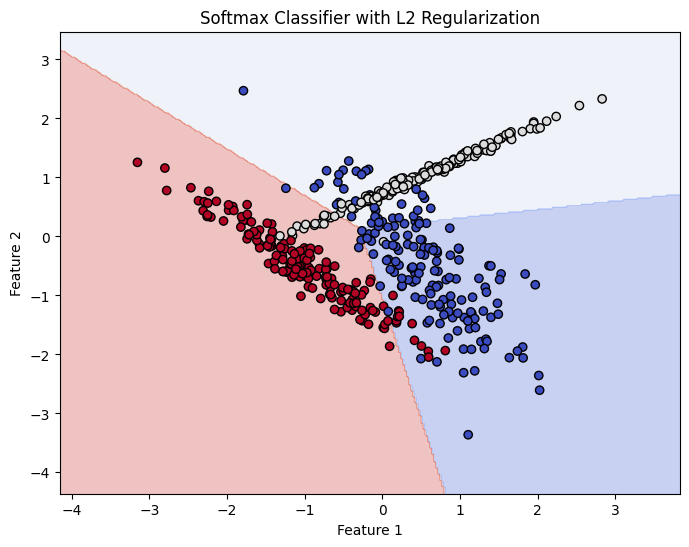

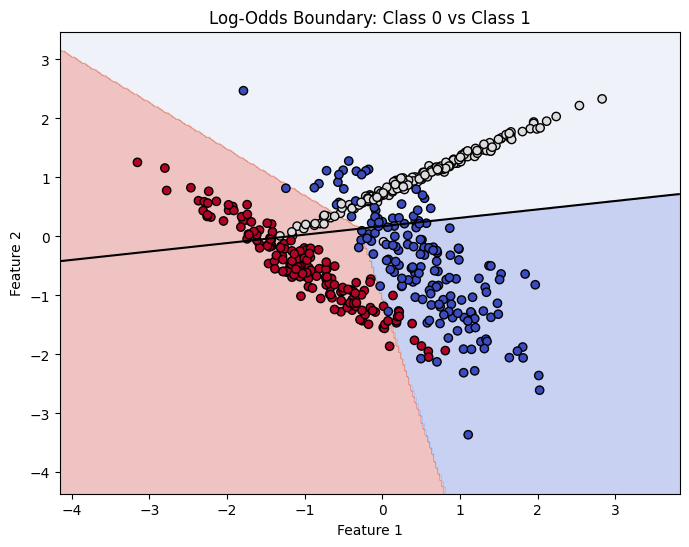

In [4]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic 2D 3-class dataset
def generate_data():
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            n_classes=3, random_state=42)
    X = StandardScaler().fit_transform(X)
    return X, y

# Run the model
X, y = generate_data()
model = SoftmaxClassifier(lr=0.1, epochs=1000, reg_lambda=0.1)
model.fit(X, y)
model.plot_decision_boundary(X, y)
model.plot_log_odds(0, 1, X, y)